In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm, t, binom, poisson
import seaborn as sns
from numpy import random

import pylab
from pylab import legend, plot, show, title, xlabel, ylabel

In [3]:
df_app = pd.read_csv('application_data.csv')

In [4]:
df_prv = pd.read_csv('previous_application.csv')

In [5]:
df_app.shape

(307511, 122)

In [6]:
df_prv.shape

(1670214, 37)

In [14]:
df_prv.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [16]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [18]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_prv.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [23]:
df_prv.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [24]:
print(df_app.isnull().sum().sort_values(ascending=False))

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64


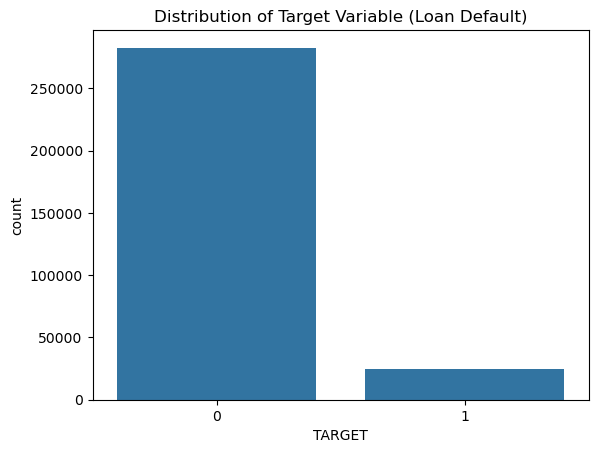

In [26]:
# Distribution of TARGET variable
sns.countplot(x='TARGET', data=df_app)
plt.title('Distribution of Target Variable (Loan Default)')
plt.show()

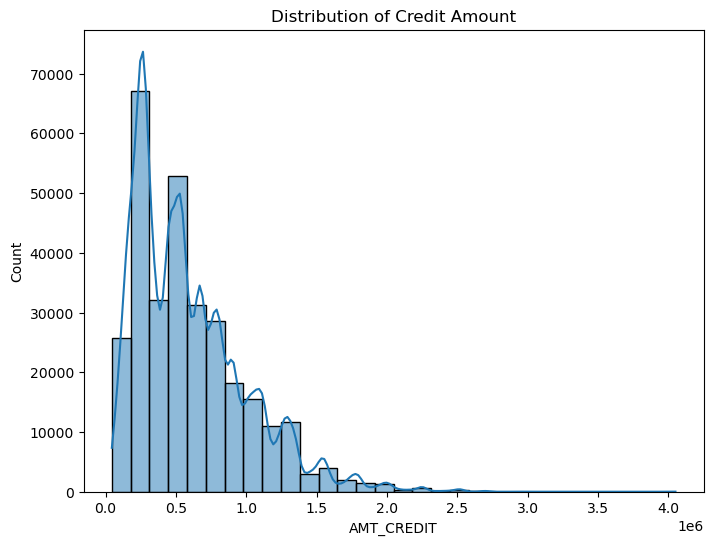

In [28]:
# Analyzing AMT_CREDIT
plt.figure(figsize=(8, 6))
sns.histplot(df_app['AMT_CREDIT'], kde=True, bins=30)
plt.title('Distribution of Credit Amount')
plt.show()

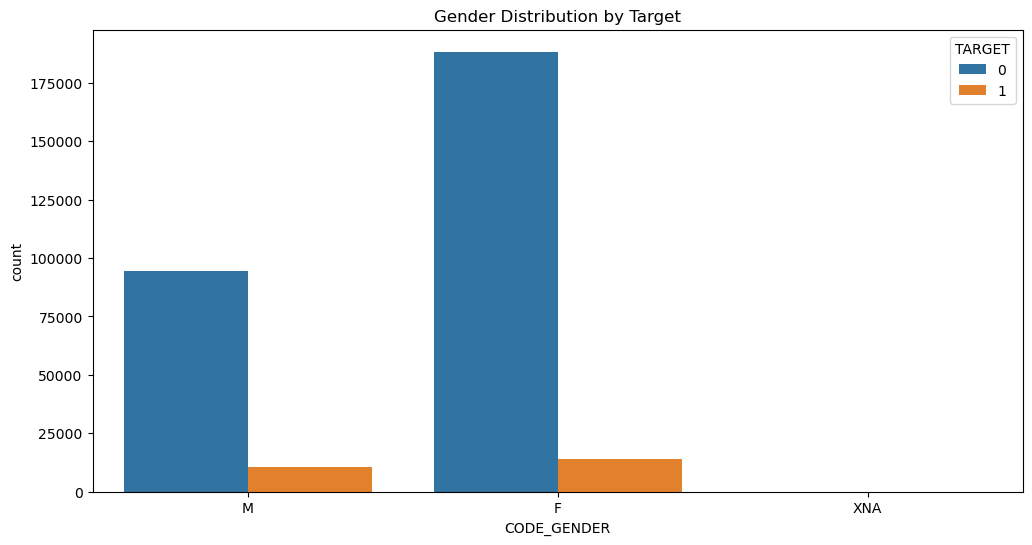

In [31]:
# Demographic Variables (Gender, Education, Income Type)
plt.figure(figsize=(12, 6))
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df_app)
plt.title('Gender Distribution by Target')
plt.show()


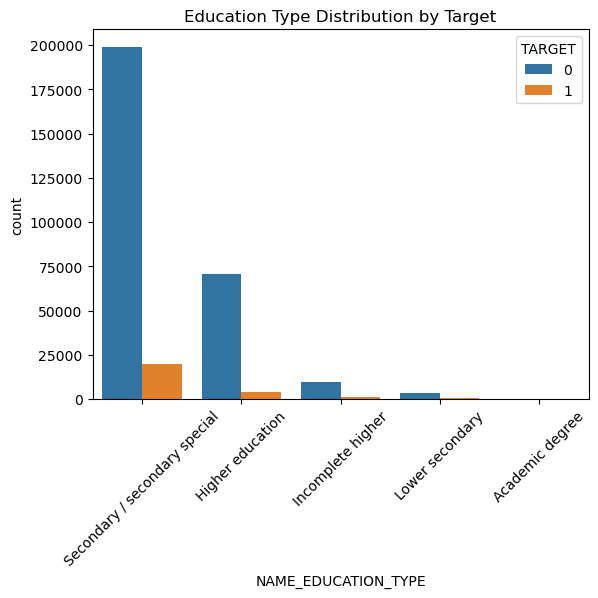

In [32]:
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df_app)
plt.title('Education Type Distribution by Target')
plt.xticks(rotation=45)
plt.show()


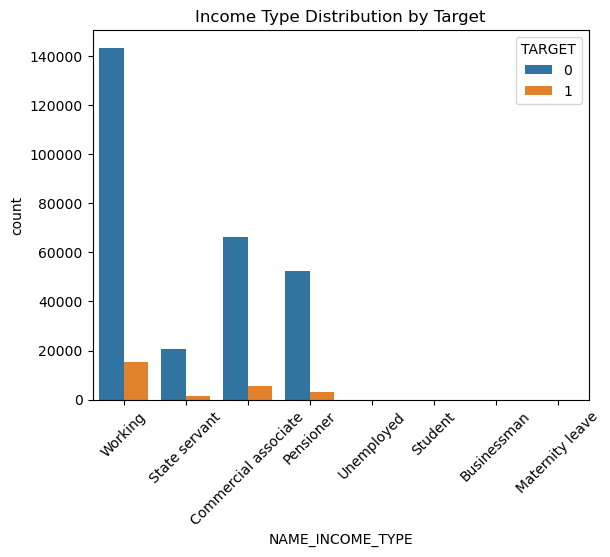

In [34]:
sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=df_app)
plt.title('Income Type Distribution by Target')
plt.xticks(rotation=45)
plt.show()

# Removing unnecessary columns from the dataset

### **Columns to Keep in `application` Dataset**

### **Essential for Loan Default Analysis**

1. `TARGET` - The target variable (default or not).
2. `AMT_CREDIT` - Total credit amount of the loan.
3. `AMT_ANNUITY` - Loan repayment amount per period.
4. `AMT_GOODS_PRICE` - Price of the goods related to the loan.
5. `AMT_INCOME_TOTAL` - Total income of the applicant.
6. `NAME_CONTRACT_TYPE` - Type of loan contract.
7. `CODE_GENDER` - Gender of the applicant (helps identify demographic risk).
8. `FLAG_OWN_CAR`, `FLAG_OWN_REALTY` - Indicates ownership of car/real estate (potential for collateral).
9. `CNT_CHILDREN` - Number of children (financial dependency).
10. `NAME_INCOME_TYPE` - Source of income (e.g., working, pensioner).
11. `NAME_EDUCATION_TYPE` - Education level (affects financial literacy and stability).
12. `NAME_FAMILY_STATUS` - Marital status (may affect risk of default).
13. `NAME_HOUSING_TYPE` - Housing arrangement (own house vs rented).
14. `REGION_POPULATION_RELATIVE` - Socioeconomic context of the region.
15. `DAYS_BIRTH` - Age of the applicant (can create age-related features).
16. `DAYS_EMPLOYED` - Employment duration (financial stability indicator).
17. `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3` - External risk scores (highly predictive).
18. `OCCUPATION_TYPE` - Profession of the applicant (income stability).
19. `CNT_FAM_MEMBERS` - Number of dependents (financial burden).
20. `LOAN_INCOME_RATIO` (calculated) - Ratio of loan amount to income (risk indicator).

### **Operational Data**

1. `WEEKDAY_APPR_PROCESS_START` - Day of loan application (patterns in approval behavior).
2. `HOUR_APPR_PROCESS_START` - Hour of loan application.

---

### **Columns to Drop in `application` Dataset**

### **Reason: Low Predictive Power or Irrelevant**

1. **Flags and Miscellaneous Indicators**:
    - `FLAG_MOBIL`, `FLAG_EMP_PHONE`, `FLAG_WORK_PHONE`, `FLAG_CONT_MOBILE`, `FLAG_PHONE`, `FLAG_EMAIL` - These indicators have limited predictive power for financial risk.
2. **Documents Flags**:
    - `FLAG_DOCUMENT_*` - Flags indicating submitted documents are unlikely to add significant predictive value.
3. **Registration/ID Dates**:
    - `DAYS_REGISTRATION`, `DAYS_ID_PUBLISH` - These may not directly impact repayment behavior.
4. **Mode/Average/Median Columns**:
    - Columns like `APARTMENTS_AVG`, `BASEMENTAREA_AVG`, `YEARS_BUILD_MODE`, etc., are aggregated features with high redundancy and low interpretability.
5. **Rarely Populated Columns**:
    - `FONDKAPREMONT_MODE`, `HOUSETYPE_MODE`, `WALLSMATERIAL_MODE`, `EMERGENCYSTATE_MODE` - These columns often have excessive missing values and limited predictive power.

---

### **Columns to Keep in `previous_application` Dataset**

### **Essential for Historical Loan Analysis**

1. `SK_ID_CURR` - Links with the `application` dataset.
2. `NAME_CONTRACT_TYPE` - Type of previous loan (e.g., consumer loan, credit card).
3. `AMT_APPLICATION`, `AMT_CREDIT`, `AMT_DOWN_PAYMENT` - Loan amounts and down payment.
4. `NAME_CONTRACT_STATUS` - Status of previous applications (e.g., approved, refused).
5. `DAYS_DECISION` - Time since the decision on the previous application.
6. `NAME_CASH_LOAN_PURPOSE` - Purpose of the previous loan (categorical analysis).
7. `CNT_PAYMENT` - Number of installments.
8. `RATE_DOWN_PAYMENT` - Down payment as a percentage of the loan.
9. `RATE_INTEREST_PRIMARY`, `RATE_INTEREST_PRIVILEGED` - Interest rates (if available).

---

### **Columns to Drop in `previous_application` Dataset**

### **Reason: Low Predictive Power or Redundancy**

1. **Time Indicators**:
    - `WEEKDAY_APPR_PROCESS_START`, `HOUR_APPR_PROCESS_START` - Redundant for historical analysis since `DAYS_DECISION` is available.
2. **Seller and Portfolio Data**:
    - `SELLERPLACE_AREA`, `NAME_SELLER_INDUSTRY`, `NAME_PORTFOLIO` - Less likely to influence repayment behavior.
3. **Rarely Populated or High Missing Values**:
    - `DAYS_FIRST_DRAWING`, `DAYS_FIRST_DUE`, `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_LAST_DUE`, `DAYS_TERMINATION` - Excessive missing values or limited usefulness.
4. **Product Type Indicators**:
    - `NAME_PRODUCT_TYPE`, `PRODUCT_COMBINATION` - Redundant for predictive purposes.
5. **Flags**:
    - `FLAG_LAST_APPL_PER_CONTRACT`, `NFLAG_LAST_APPL_IN_DAY`, `NFLAG_INSURED_ON_APPROVAL` - Provide minimal additional insights.

In [40]:
# Columns to keep for analysis
application_keep = [
    'SK_ID_CURR','TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
    'EXT_SOURCE_3', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'
]

previous_application_keep = [
    'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT',
    'AMT_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 
    'NAME_CASH_LOAN_PURPOSE', 'CNT_PAYMENT', 'RATE_DOWN_PAYMENT'
]

# Dropping unnecessary columns
app = df_app[application_keep]
prv = df_prv[previous_application_keep]


### **Final Selected Columns**

After filtering unnecessary columns, the **application** dataset can focus on:

- Loan amounts, income, and repayment metrics.
- Demographics (age, gender, education, occupation).
- Loan purpose and external risk factors.

The **previous_application** dataset can focus on:

- Historical loan details, contract type, and payment status.
- Down payment and interest rates.

In [43]:
app.shape

(307511, 23)

In [45]:
prv.shape

(1670214, 10)

# Removing NULL Values / Filling NULL values

In [48]:
app.head()

,SK_ID_CURR,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,406597.5,24700.5,351000.0,202500.0,Cash loans,M,N,Y,...,Single / not married,House / apartment,0.018801,-9461,-637,0.083037,0.262949,0.139376,Laborers,1.0
1,100003,0,1293502.5,35698.5,1129500.0,270000.0,Cash loans,F,N,N,...,Married,House / apartment,0.003541,-16765,-1188,0.311267,0.622246,NaN,Core staff,2.0
2,100004,0,135000.0,6750.0,135000.0,67500.0,Revolving loans,M,Y,Y,...,Single / not married,House / apartment,0.010032,-19046,-225,NaN,0.555912,0.729567,Laborers,1.0
3,100006,0,312682.5,29686.5,297000.0,135000.0,Cash loans,F,N,Y,...,Civil marriage,House / apartment,0.008019,-19005,-3039,NaN,0.650442,NaN,Laborers,2.0
4,100007,0,513000.0,21865.5,513000.0,121500.0,Cash loans,M,N,Y,...,Single / not married,House / apartment,0.028663,-19932,-3038,NaN,0.322738,NaN,Core staff,1.0


In [50]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
AMT_INCOME_TOTAL                   0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
dtype: int64

In [52]:
app['AMT_ANNUITY'].median()

24903.0

In [54]:
app['AMT_GOODS_PRICE'].median()

450000.0

In [56]:
app['AMT_GOODS_PRICE'] = app['AMT_GOODS_PRICE'].fillna(app['AMT_GOODS_PRICE'].median())
# using the median as it neglects the outliers

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\3330886115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['AMT_GOODS_PRICE'] = app['AMT_GOODS_PRICE'].fillna(app['AMT_GOODS_PRICE'].median())


In [58]:
app['AMT_ANNUITY'] = app.AMT_ANNUITY.fillna(app.AMT_ANNUITY.median())
# using the median as it neglects the outliers

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\852730923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['AMT_ANNUITY'] = app.AMT_ANNUITY.fillna(app.AMT_ANNUITY.median())


In [60]:
app['EXT_SOURCE_1'].median()

0.5059979305057544

In [62]:
app['EXT_SOURCE_1'] = app['EXT_SOURCE_1'].fillna(app['EXT_SOURCE_1'].median())

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\92493581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['EXT_SOURCE_1'] = app['EXT_SOURCE_1'].fillna(app['EXT_SOURCE_1'].median())


In [64]:
app['EXT_SOURCE_2'] = app['EXT_SOURCE_2'].fillna(app['EXT_SOURCE_2'].median())

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\283358780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['EXT_SOURCE_2'] = app['EXT_SOURCE_2'].fillna(app['EXT_SOURCE_2'].median())


In [66]:
app['EXT_SOURCE_3'] = app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].median())

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\512320576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['EXT_SOURCE_3'] = app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].median())


In [70]:
app['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [72]:
values = app['OCCUPATION_TYPE'].value_counts().reset_index()

In [74]:
sum(app['OCCUPATION_TYPE'].value_counts())

211120

In [76]:
values

,OCCUPATION_TYPE,count
0,Laborers,55186
1,Sales staff,32102
2,Core staff,27570
3,Managers,21371
4,Drivers,18603
5,High skill tech staff,11380
6,Accountants,9813
7,Medicine staff,8537
8,Security staff,6721
9,Cooking staff,5946


In [78]:
values['prop1'] = values['count']/211120

In [80]:
values

,OCCUPATION_TYPE,count,prop1
0,Laborers,55186,0.261396
1,Sales staff,32102,0.152056
2,Core staff,27570,0.130589
3,Managers,21371,0.101227
4,Drivers,18603,0.088116
5,High skill tech staff,11380,0.053903
6,Accountants,9813,0.046481
7,Medicine staff,8537,0.040437
8,Security staff,6721,0.031835
9,Cooking staff,5946,0.028164


In [82]:
values['index_to_fill'] = values['prop1'] * 96391

In [84]:
values['index_to_fill'] = values['index_to_fill'].round()

In [86]:
values

,OCCUPATION_TYPE,count,prop1,index_to_fill
0,Laborers,55186,0.261396,25196.0
1,Sales staff,32102,0.152056,14657.0
2,Core staff,27570,0.130589,12588.0
3,Managers,21371,0.101227,9757.0
4,Drivers,18603,0.088116,8494.0
5,High skill tech staff,11380,0.053903,5196.0
6,Accountants,9813,0.046481,4480.0
7,Medicine staff,8537,0.040437,3898.0
8,Security staff,6721,0.031835,3069.0
9,Cooking staff,5946,0.028164,2715.0


In [88]:
app['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [90]:
data =  {
    'Laborers': 25196,
    'Sales staff': 14657,
    'Core staff': 12588,
    'Managers': 9757,
    'Drivers': 8494,
    'High skill tech staff': 5196,
    'Accountants': 4480,
    'Medicine staff': 3898,
    'Security staff': 3069,
    'Cooking staff': 2715,
    'Cleaning staff': 2124,
    'Private service staff': 1211,
    'Low-skill Laborers': 956,
    'Waiters/barmen staff': 615,
    'Secretaries': 596,
    'Realty agents': 343,
    'HR staff': 257,
    'IT staff': 240
}


In [94]:
data.items()

dict_items([('Laborers', 25196), ('Sales staff', 14657), ('Core staff', 12588), ('Managers', 9757), ('Drivers', 8494), ('High skill tech staff', 5196), ('Accountants', 4480), ('Medicine staff', 3898), ('Security staff', 3069), ('Cooking staff', 2715), ('Cleaning staff', 2124), ('Private service staff', 1211), ('Low-skill Laborers', 956), ('Waiters/barmen staff', 615), ('Secretaries', 596), ('Realty agents', 343), ('HR staff', 257), ('IT staff', 240)])

In [97]:
# Fill null values based on the defined counts
start = 0
for occupation, count in data.items():
    end = start + count
    app.loc[ind[start:end], 'OCCUPATION_TYPE'] = occupation
    start = end

In [99]:
app.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
AMT_INCOME_TOTAL              0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               2
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

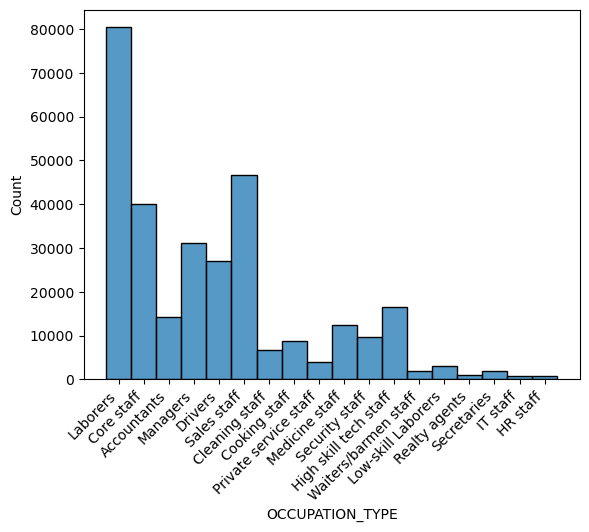

In [101]:
sns.histplot(app['OCCUPATION_TYPE'])
plt.xticks(rotation=45, ha='right')

In [103]:
app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 80382
Sales staff              46759
Core staff               40158
Managers                 31128
Drivers                  27097
High skill tech staff    16576
Accountants              14293
Medicine staff           12435
Security staff            9790
Cooking staff             8661
Cleaning staff            6777
Private service staff     3863
Low-skill Laborers        3049
Waiters/barmen staff      1963
Secretaries               1901
Realty agents             1094
HR staff                   820
IT staff                   765
Name: count, dtype: int64

In [106]:
app['CNT_FAM_MEMBERS'].mode()
# here even though the value is numerical, the data is of discrete values, i.e. we really cannot have 3.65 family members.
# Hence we used 

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [108]:
app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].fillna(2.0)

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\1481982073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].fillna(2.0)


In [110]:
app.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
AMT_INCOME_TOTAL              0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
dtype: int64

In [112]:
correlation_matrix = app.corr(numeric_only=True)

<Axes: >

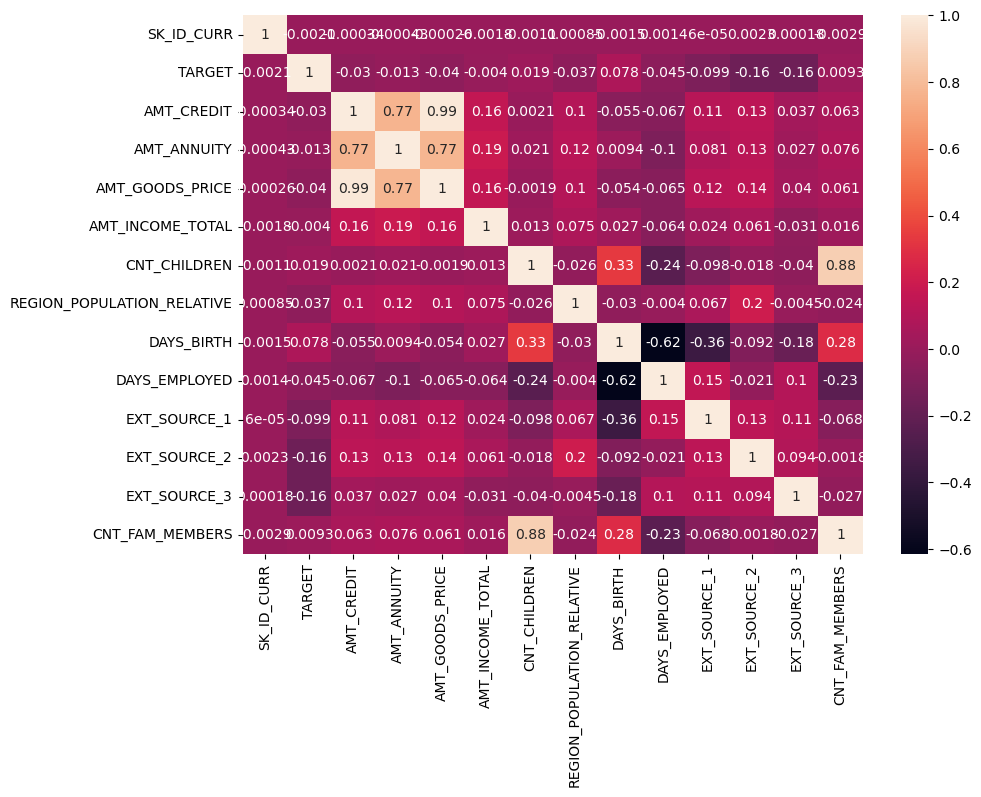

In [114]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)

# Univariate Analysis

Univariate analysis focuses on understanding the distribution and summary statistics of individual variables.

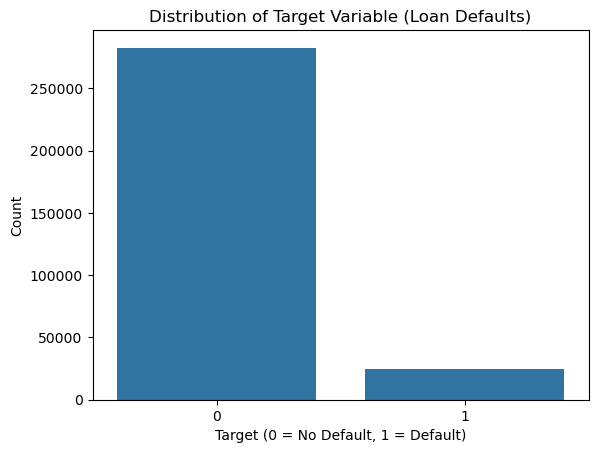

In [118]:
# 1. Distribution of the target variable (clients with payment difficulties)
sns.countplot(x='TARGET', data=app)
plt.title('Distribution of Target Variable (Loan Defaults)')
plt.xlabel('Target (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()


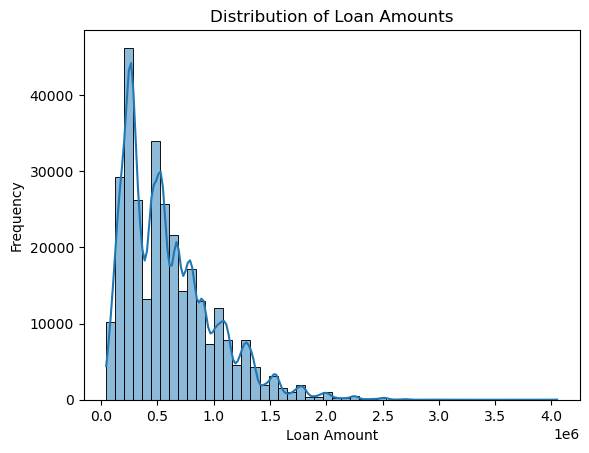

In [120]:
# 2. Distribution of loan amounts
sns.histplot(app['AMT_CREDIT'], kde=True, bins=50)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\2135934089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['AGE'] = -app['DAYS_BIRTH'] / 365
C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\2135934089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['AGE'] = app['AGE'].astype(int, errors='ignore')


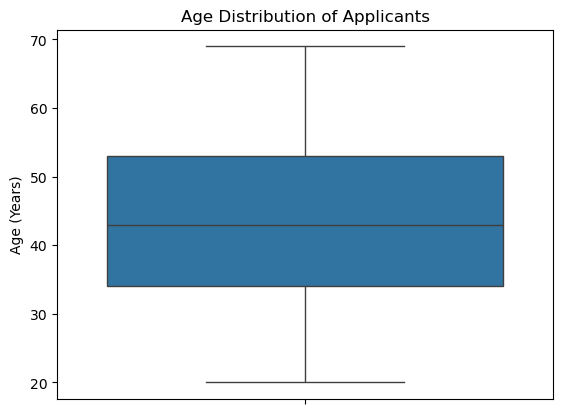

In [121]:
# 4. Boxplot of age (DAYS_BIRTH converted to years)
app['AGE'] = -app['DAYS_BIRTH'] / 365
app['AGE'] = app['AGE'].astype(int, errors='ignore')
sns.boxplot(y='AGE', data=app)
plt.title('Age Distribution of Applicants')
plt.ylabel('Age (Years)')
plt.show()

In [123]:
app.AGE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: AGE
Non-Null Count   Dtype
--------------   -----
307511 non-null  int32
dtypes: int32(1)
memory usage: 1.2 MB


C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\3491986662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['LOAN_INCOME_RATIO'] = app['AMT_CREDIT'] / app['AMT_INCOME_TOTAL']


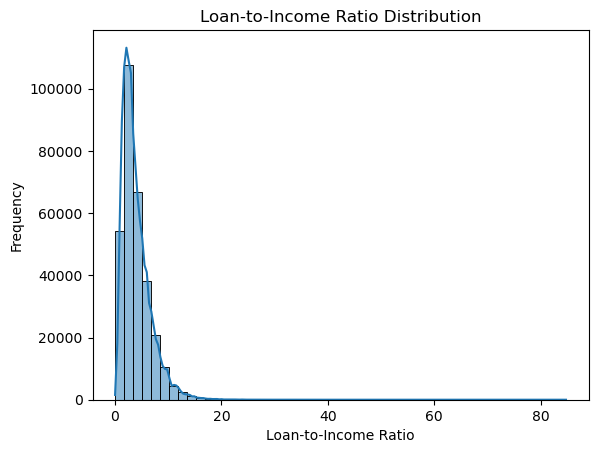

In [126]:
# 5. Loan-to-income ratio
app['LOAN_INCOME_RATIO'] = app['AMT_CREDIT'] / app['AMT_INCOME_TOTAL']
sns.histplot(app['LOAN_INCOME_RATIO'], kde=True, bins=50)
plt.title('Loan-to-Income Ratio Distribution')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

In [127]:
prv['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

**Univariate Analysis**

Univariate analysis focuses on individual variables to understand their distribution and highlight significant patterns that may influence loan default behavior.

- **Target Variable Distribution:**
    - The proportion of clients with payment difficulties (defaults) vs those who pay on time is analyzed.
    - Insight: This helps identify if the dataset is imbalanced and emphasizes the challenge of identifying defaulters effectively.
- **Loan Amount Distribution**:
    - Visualizing the distribution of loan amounts helps understand the range and typical loan sizes.
    - Insight: A wider loan distribution may indicate that the default probability varies significantly based on loan size.
- **Income Distribution:**
    - Applicant income distribution shows the financial capacity of borrowers.
    - Insight: Low-income borrowers might be more likely to default, indicating income is a critical factor.
- **Age Distribution**:
    - Applicant ages are derived from the DAYS_BIRTH column.
    - Insight: Younger borrowers might have higher default rates due to financial instability.
- **Loan-to-Income Ratio**:
    - The ratio of loan amount to income highlights whether applicants are over-leveraged.
    - Insight: Higher ratios suggest higher risk, helping assess repayment ability.

## Insights on Univariate:

- Identify the distribution of income, loan amounts, and loan-to-income ratios.
- Understand the age distribution and its relevance to defaults.

# Bivariate Analysis:

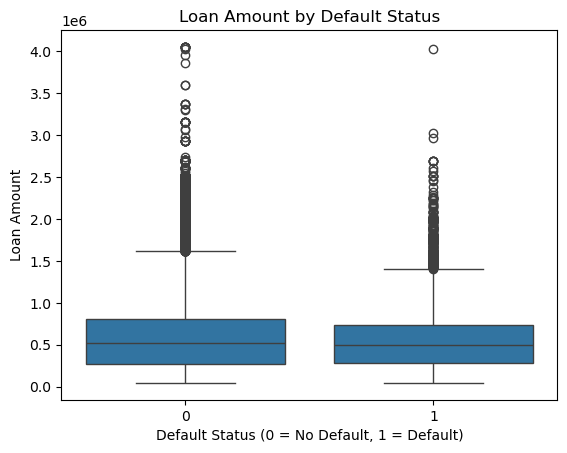

In [134]:
# 6. Target variable vs Loan Amount
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=app)
plt.title('Loan Amount by Default Status')
plt.xlabel('Default Status (0 = No Default, 1 = Default)')
plt.ylabel('Loan Amount')
plt.show()

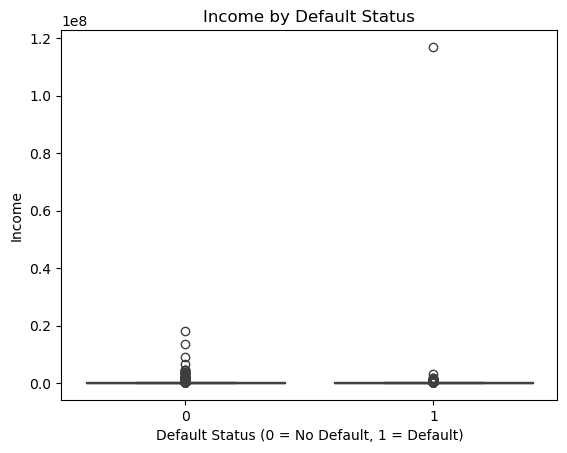

In [136]:
# 7. Target variable vs Income
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app)
plt.title('Income by Default Status')
plt.xlabel('Default Status (0 = No Default, 1 = Default)')
plt.ylabel('Income')
plt.show()


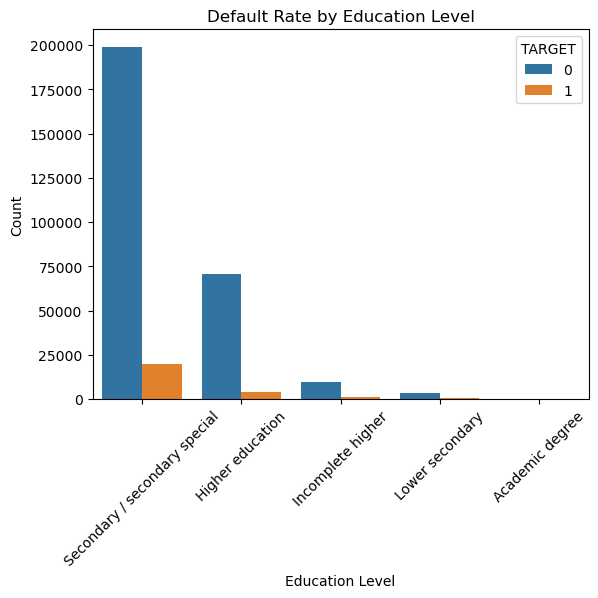

In [138]:
# 8. Default rate by Education Level
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=app)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

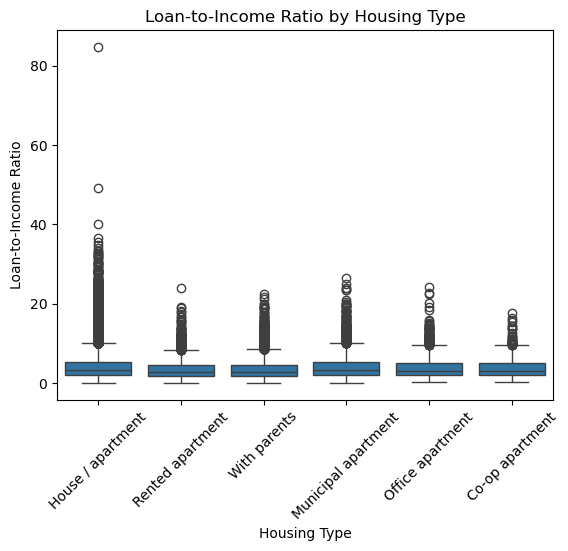

In [140]:
# 9. Housing type vs Loan-to-Income Ratio
sns.boxplot(x='NAME_HOUSING_TYPE', y='LOAN_INCOME_RATIO', data=app)
plt.title('Loan-to-Income Ratio by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Loan-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

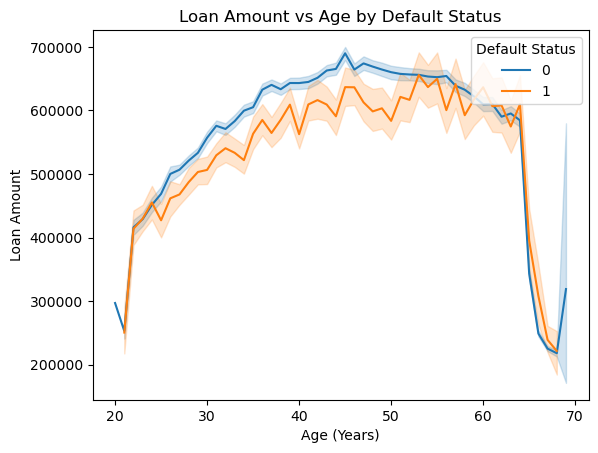

In [142]:
# 10. Relationship between Age and Loan Amount
sns.lineplot(x='AGE', y='AMT_CREDIT', hue='TARGET', data=app)
plt.title('Loan Amount vs Age by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Loan Amount')
plt.legend(title='Default Status', loc='upper right')
plt.show()

**Bivariate Analysis**

Bivariate analysis investigates relationships between two variables to identify trends influencing loan defaults.

- **Loan Amount vs Target**:
    - Loan amounts are compared for defaulters and non-defaulters.
    - Insight: Identifies whether larger loans are more likely to default, indicating loan size as a potential risk driver.
- **Income vs Target**:
    - Analyzing applicant income for defaulters vs non-defaulters helps assess income as a default predictor.
    - Insight: Default rates may be higher for lower-income groups, suggesting income thresholds for loan approval.
- **Education Level vs Default Rate**:
    - Examines the relationship between education and default.
    - Insight: Lower education levels might correlate with higher default rates due to lack of financial literacy or unstable jobs.
- **Housing Type vs Loan-to-Income Ratio**:
    - Loan-to-income ratios across housing types reveal financial behavior.
    - Insight: Renters may have higher ratios, indicating higher financial stress compared to homeowners.
- **Age vs Loan Amount**:
    - Correlates borrower age with loan amount across default categories.
    - Insight: Younger borrowers might take smaller loans but could default more often, showing age-based risk trends.based risk trends.

# Multivariate Analysis (Before Split):

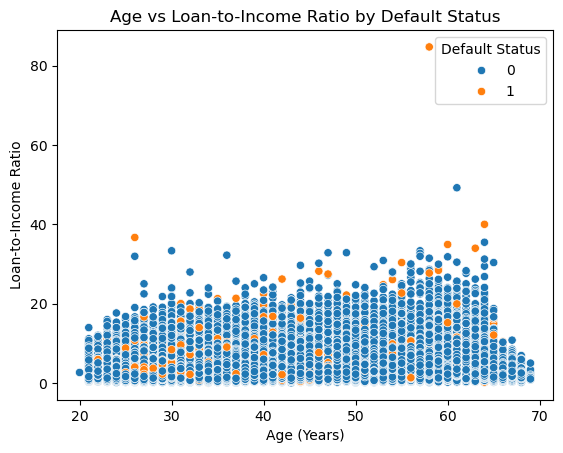

In [146]:
# 11. Age vs Loan-to-Income Ratio by Default Status
sns.scatterplot(x='AGE', y='LOAN_INCOME_RATIO', hue='TARGET', data=app)
plt.title('Age vs Loan-to-Income Ratio by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Loan-to-Income Ratio')
plt.legend(title='Default Status', loc='upper right')
plt.show()

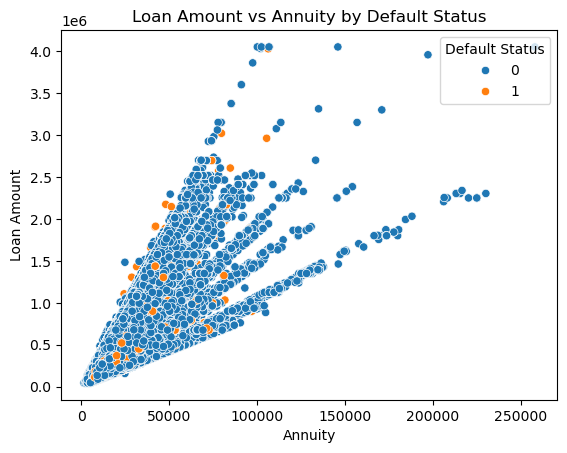

In [147]:
# 13. Loan Amount vs Annuity by Default Status
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', hue='TARGET', data=app)
plt.title('Loan Amount vs Annuity by Default Status')
plt.xlabel('Annuity')
plt.ylabel('Loan Amount')
plt.legend(title='Default Status', loc='upper right')
plt.show()

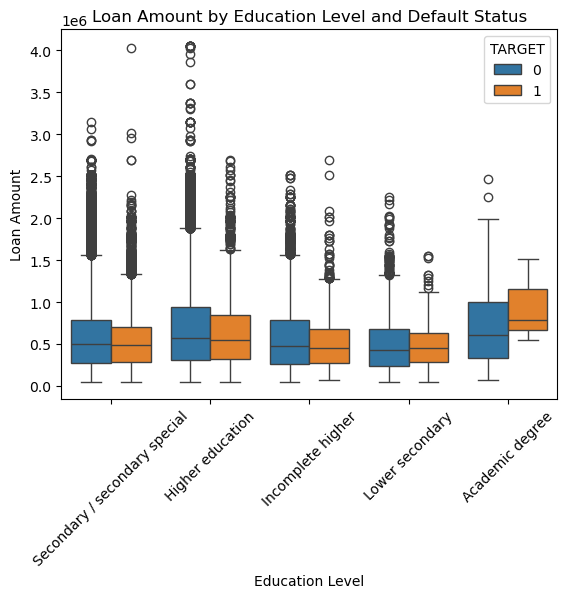

In [150]:
# 14. Education Level vs Loan Amount vs Default Status
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='TARGET', data=app)
plt.title('Loan Amount by Education Level and Default Status')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

**Multivariate Analysis**

Multivariate analysis explores relationships among multiple variables to identify patterns and driving factors behind defaults.

- **Age vs Loan-to-Income Ratio by Default Status**:
    - Analyzes how age and loan-to-income ratios interact for defaulters vs non-defaulters.
    - Insight: Younger applicants with high loan-to-income ratios are more likely to default, emphasizing the need for stricter screening.
- **EXT_SOURCE_1 vs EXT_SOURCE_2 by Target**:
    - External risk scores are plotted against each other across default categories.
    - Insight: Strong correlations between risk scores and default behavior highlight their predictive importance.
- **Loan Amount vs Annuity by Target**:
    - Compares loan amounts and annuities for defaulters and non-defaulters.
    - Insight: Larger loans with higher annuities are riskier, indicating repayment strain.
- **Education Level vs Loan Amount vs Default Status**:
    - Studies the interaction between education, loan amount, and defaults.
    - Insight: Higher loan amounts among less educated groups increase default risk, reinforcing the role of education in financial stability.
- **Loan Purpose vs Payment Terms by Contract Status**:
    - Examines loan purpose, repayment terms, and contract outcomes.
    - Insight: Shorter terms for high-risk purposes (e.g., personal loans) might lead to cancellations or refusals, aiding in portfolio adjustments.

In [153]:
# Client with payment difficulties (Target=1)
df_current_target_1 = app[app['TARGET'] == 1]

# Client with all other cases (Target=0)
df_current_target_0 = app[app['TARGET'] == 0]

# Univariate Analysis (After Splitting)

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\1914436333.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\1914436333.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


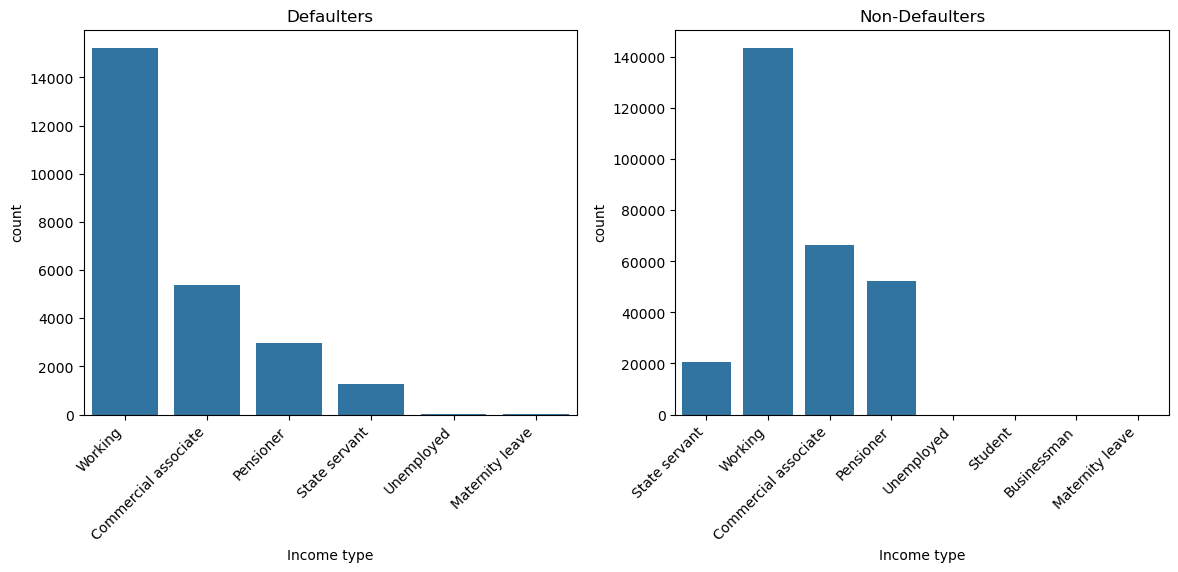

In [156]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

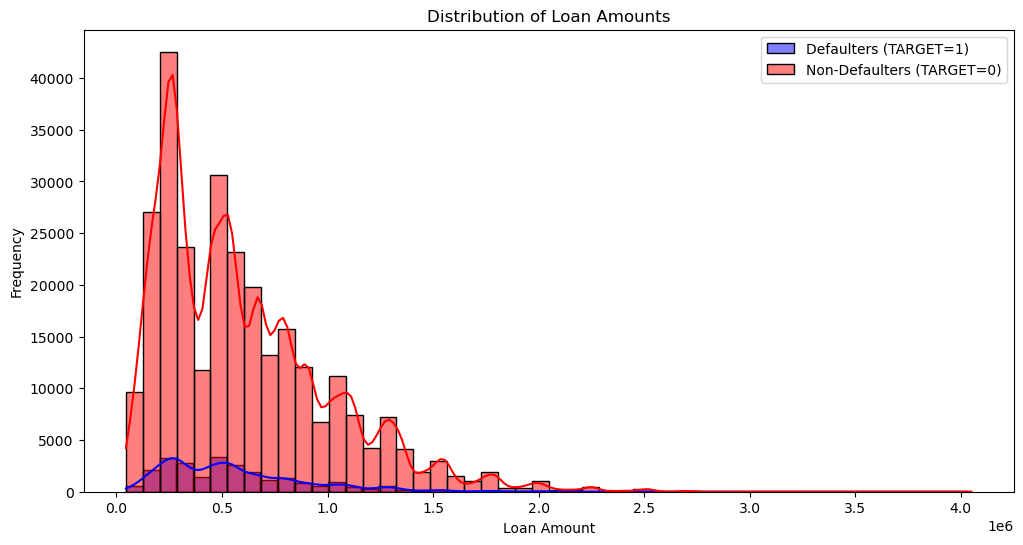

In [162]:
#  Distribution of Loan Amounts for Defaulters and Non-Defaulters
plt.figure(figsize=(12, 6))
sns.histplot(df_current_target_1['AMT_CREDIT'], kde=True, bins=50, color='blue', label='Defaulters (TARGET=1)')
sns.histplot(df_current_target_0['AMT_CREDIT'], kde=True, bins=50, color='red', label='Non-Defaulters (TARGET=0)')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

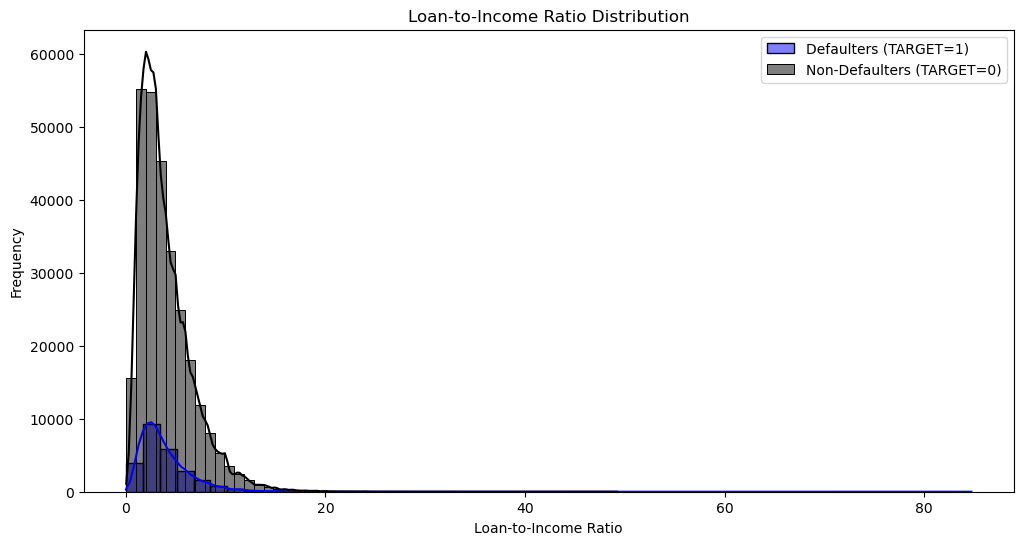

In [164]:
#  Loan-to-Income Ratio Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_current_target_1['LOAN_INCOME_RATIO'], kde=True, bins=50, color='blue', label='Defaulters (TARGET=1)')
sns.histplot(df_current_target_0['LOAN_INCOME_RATIO'], kde=True, bins=50, color='black', label='Non-Defaulters (TARGET=0)')
plt.title('Loan-to-Income Ratio Distribution')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()


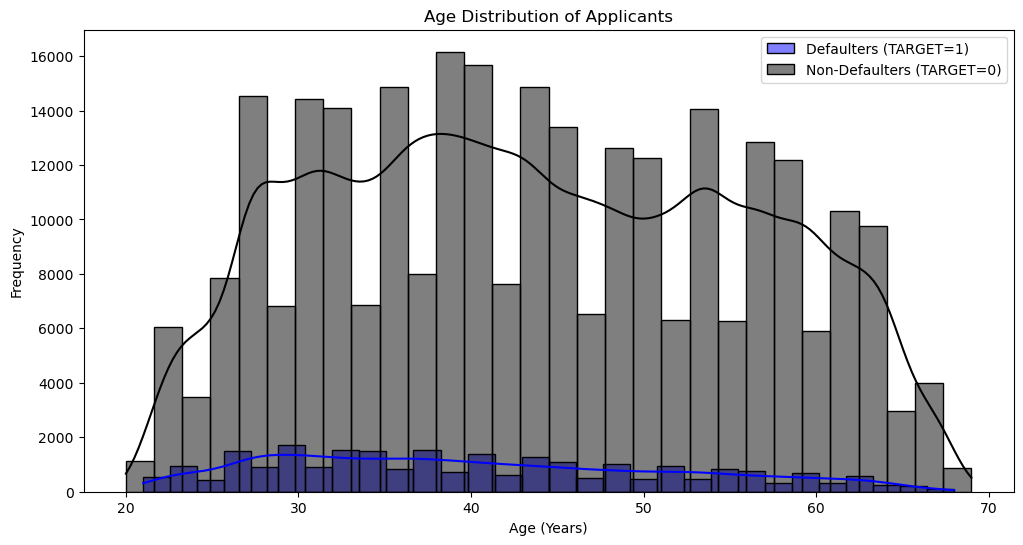

In [168]:
#  Age Distribution for Defaulters and Non-Defaulters
plt.figure(figsize=(12, 6))
sns.histplot(df_current_target_1['AGE'], kde=True, bins=30, color='blue', label='Defaulters (TARGET=1)')
sns.histplot(df_current_target_0['AGE'], kde=True, bins=30, color='black', label='Non-Defaulters (TARGET=0)')
plt.title('Age Distribution of Applicants')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Bivariate Analysis (After Splitting)

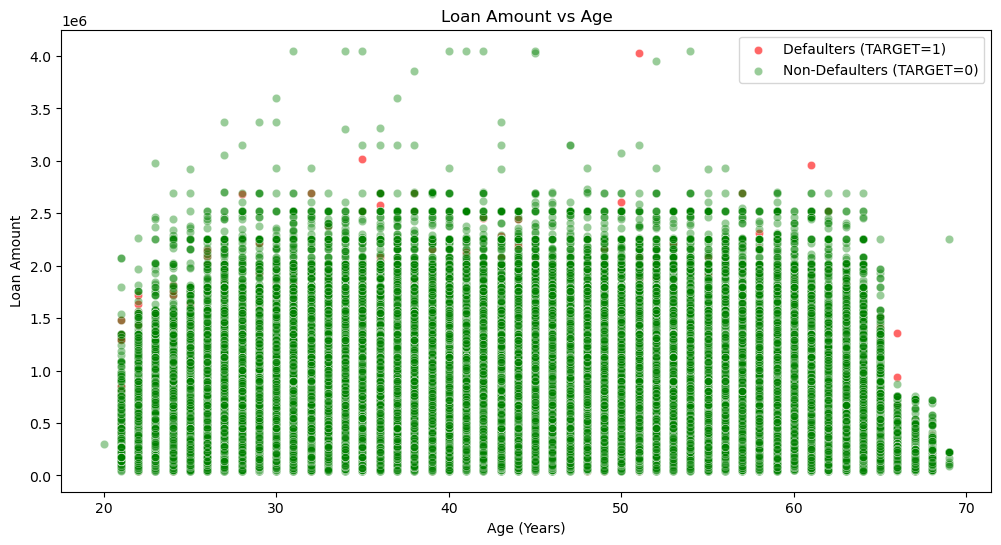

In [170]:
# Loan Amount vs Age for Defaulters and Non-Defaulters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AGE', y='AMT_CREDIT', data=df_current_target_1, color='red', label='Defaulters (TARGET=1)', alpha=0.6)
sns.scatterplot(x='AGE', y='AMT_CREDIT', data=df_current_target_0, color='green', label='Non-Defaulters (TARGET=0)', alpha=0.4)
plt.title('Loan Amount vs Age')
plt.xlabel('Age (Years)')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()

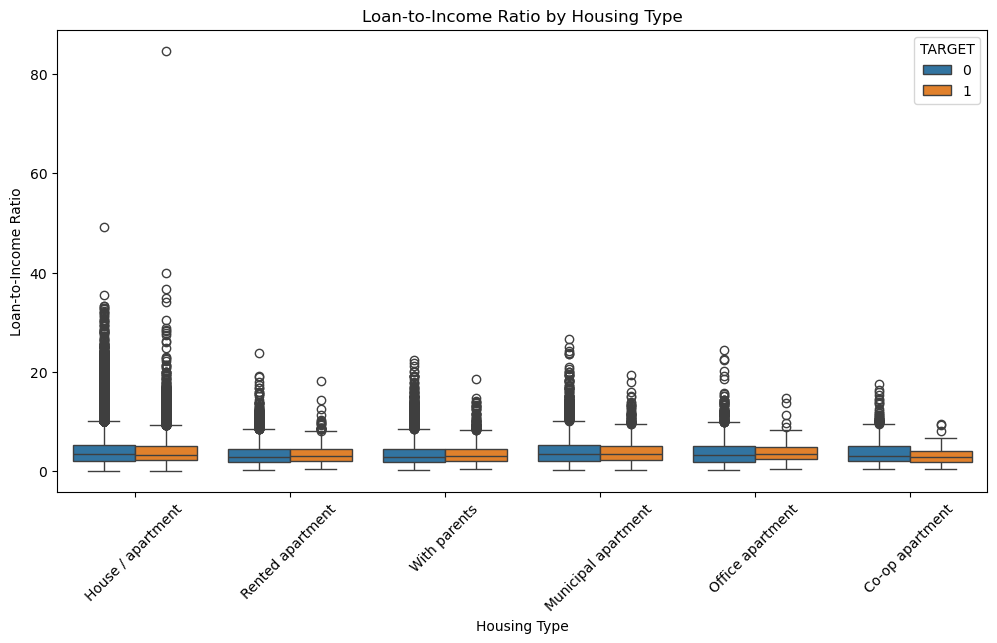

In [172]:
# Loan-to-Income Ratio by Housing Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_HOUSING_TYPE', y='LOAN_INCOME_RATIO', hue='TARGET', data=app)
plt.title('Loan-to-Income Ratio by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Loan-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

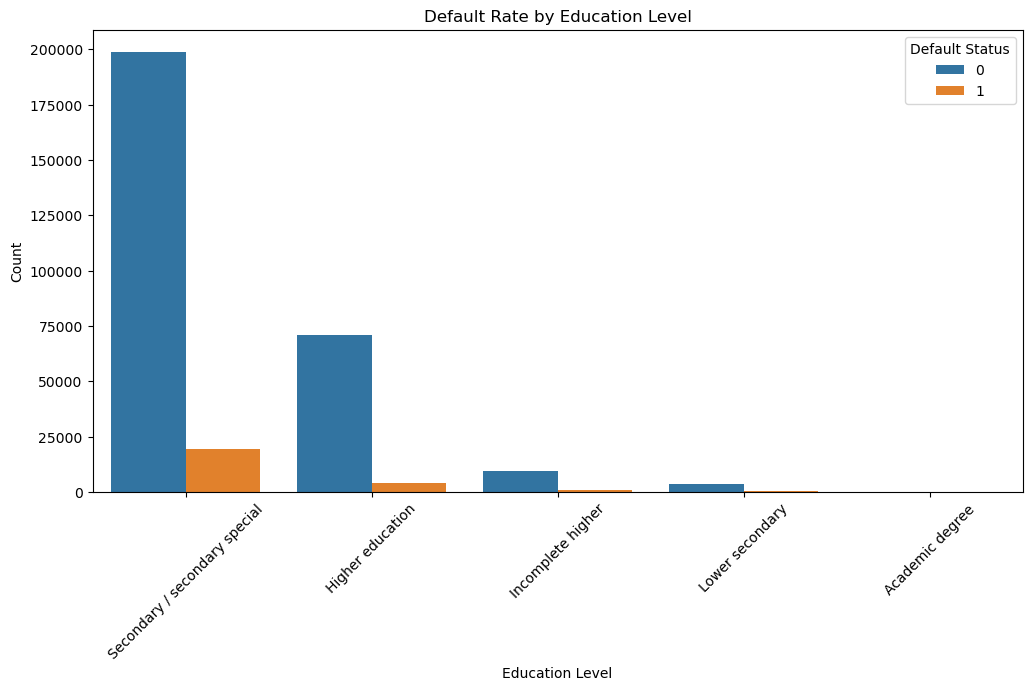

In [174]:
#  Education Level vs Default Rate
plt.figure(figsize=(12, 6))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=app)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default Status')
plt.show()


# Analysis on "previous_application_data"

In [176]:
prv.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CASH_LOAN_PURPOSE,CNT_PAYMENT,RATE_DOWN_PAYMENT
0,271877,Consumer loans,17145.0,17145.0,0.0,Approved,-73,XAP,12.0,0.0
1,108129,Cash loans,607500.0,679671.0,NaN,Approved,-164,XNA,36.0,NaN
2,122040,Cash loans,112500.0,136444.5,NaN,Approved,-301,XNA,12.0,NaN
3,176158,Cash loans,450000.0,470790.0,NaN,Approved,-512,XNA,12.0,NaN
4,202054,Cash loans,337500.0,404055.0,NaN,Refused,-781,Repairs,24.0,NaN


In [178]:
prv.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT          895844
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CASH_LOAN_PURPOSE         0
CNT_PAYMENT               372230
RATE_DOWN_PAYMENT         895844
dtype: int64

In [180]:
prv.AMT_DOWN_PAYMENT.median()

1638.0

In [182]:
prv['AMT_DOWN_PAYMENT'] = prv['AMT_DOWN_PAYMENT'].fillna(1638.0)

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\1629972169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prv['AMT_DOWN_PAYMENT'] = prv['AMT_DOWN_PAYMENT'].fillna(1638.0)


In [184]:
prv['CNT_PAYMENT'] = prv['CNT_PAYMENT'].fillna(prv['CNT_PAYMENT'].median())

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\2839338977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prv['CNT_PAYMENT'] = prv['CNT_PAYMENT'].fillna(prv['CNT_PAYMENT'].median())


In [186]:
prv['RATE_DOWN_PAYMENT'] = prv['RATE_DOWN_PAYMENT'].fillna(prv['RATE_DOWN_PAYMENT'].median())

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\878042909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prv['RATE_DOWN_PAYMENT'] = prv['RATE_DOWN_PAYMENT'].fillna(prv['RATE_DOWN_PAYMENT'].median())


In [188]:
prv.isnull().sum()

SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_APPLICATION           0
AMT_CREDIT                1
AMT_DOWN_PAYMENT          0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_CASH_LOAN_PURPOSE    0
CNT_PAYMENT               0
RATE_DOWN_PAYMENT         0
dtype: int64

# Univariate Analysis

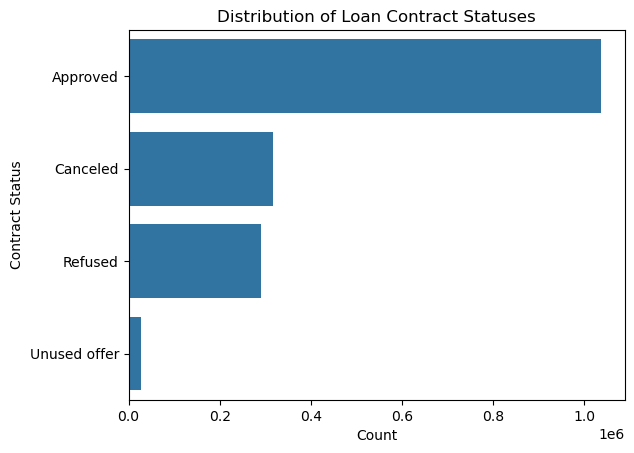

In [192]:
# 1. Distribution of contract statuses
sns.countplot(y='NAME_CONTRACT_STATUS', data=prv, order=prv['NAME_CONTRACT_STATUS'].value_counts().index)
plt.title('Distribution of Loan Contract Statuses')
plt.xlabel('Count')
plt.ylabel('Contract Status')
plt.show()



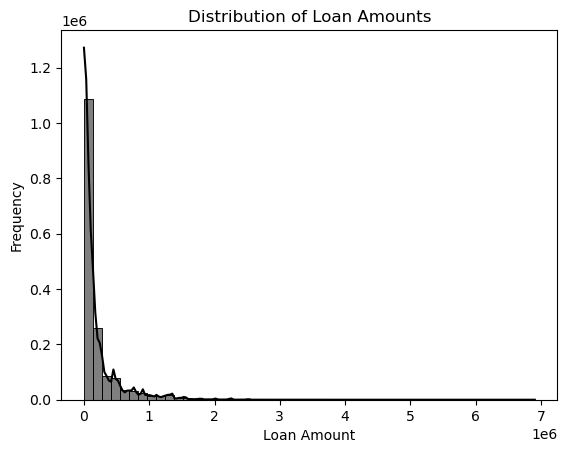

In [194]:
# 2. Distribution of loan amounts
sns.histplot(prv['AMT_CREDIT'], kde=True, bins=50,color='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()



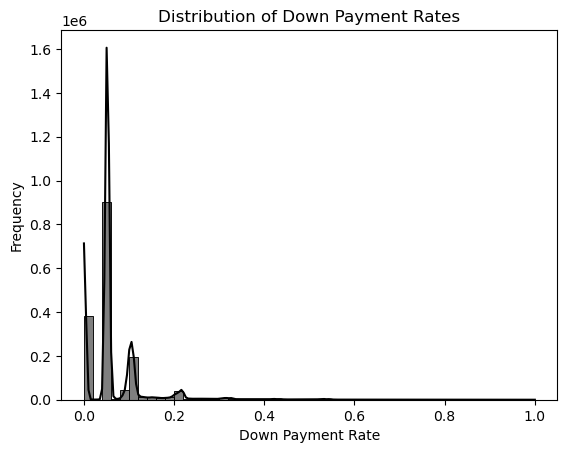

In [196]:
# 3. Distribution of down payment rates
sns.histplot(prv['RATE_DOWN_PAYMENT'], kde=True, bins=50,color='black')
plt.title('Distribution of Down Payment Rates')
plt.xlabel('Down Payment Rate')
plt.ylabel('Frequency')
plt.show()

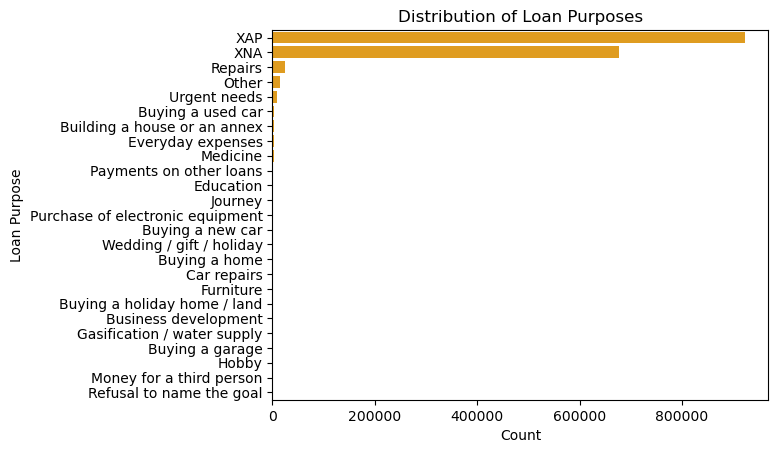

In [198]:
# 4. Count of loan purposes
sns.countplot(y='NAME_CASH_LOAN_PURPOSE', data=prv,color='orange' ,order=prv['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.title('Distribution of Loan Purposes')
plt.ylabel('Loan Purpose')
plt.xlabel('Count')
plt.show()



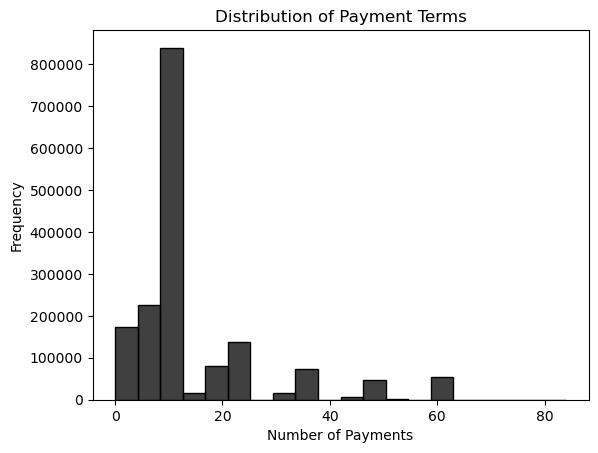

In [200]:
# 5. Distribution of payment terms
sns.histplot(prv['CNT_PAYMENT'], kde=False, bins=20,color='black')
plt.title('Distribution of Payment Terms')
plt.xlabel('Number of Payments')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

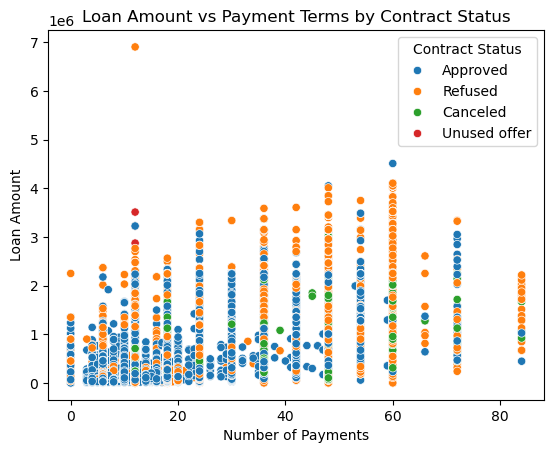

In [203]:
# 9. Loan amount vs Payment terms
sns.scatterplot(x='CNT_PAYMENT', y='AMT_CREDIT', data=prv, hue='NAME_CONTRACT_STATUS')
plt.title('Loan Amount vs Payment Terms by Contract Status')
plt.xlabel('Number of Payments')
plt.ylabel('Loan Amount')
plt.legend(title='Contract Status')
plt.show()

# Multivariate Analysis

In [205]:
correlation_matrix_prv = prv.corr(numeric_only=True)

<Axes: >

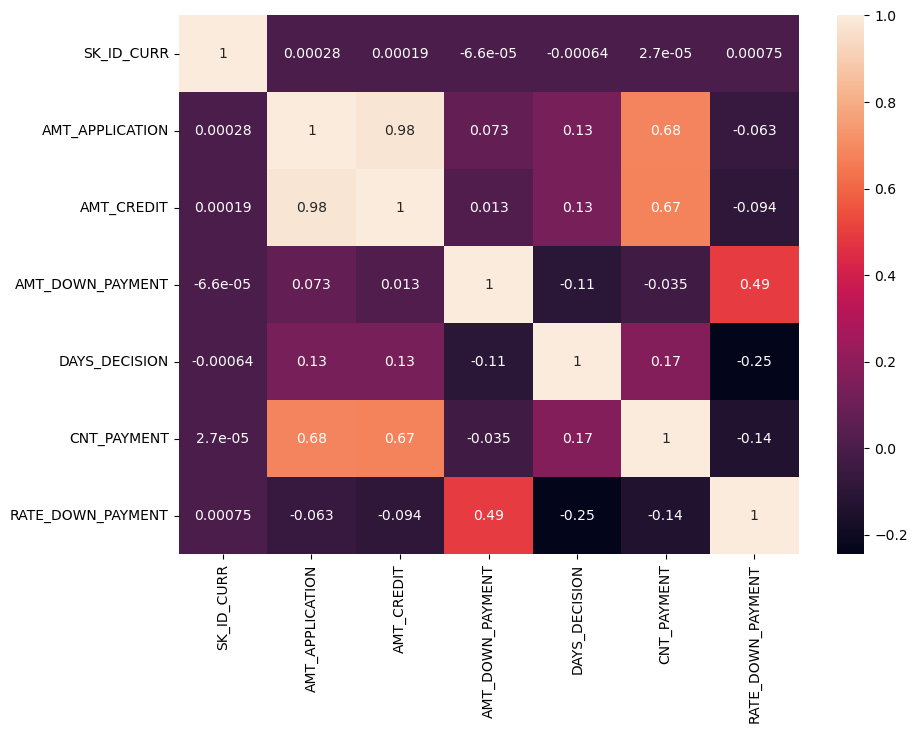

In [206]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix_prv, annot = True)

# Merging the 2 datasets (application_data and previous_application_data)

In [212]:
merged_df = pd.merge(app,prv,on='SK_ID_CURR', how='inner')
merged_df.head()

,SK_ID_CURR,TARGET,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,LOAN_INCOME_RATIO,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CASH_LOAN_PURPOSE,CNT_PAYMENT,RATE_DOWN_PAYMENT
0,100002,1,406597.5,24700.5,351000.0,202500.0,Cash loans,M,N,Y,...,2.007889,Consumer loans,179055.0,179055.0,0.0,Approved,-606,XAP,24.0,0.000000
1,100003,0,1293502.5,35698.5,1129500.0,270000.0,Cash loans,F,N,N,...,4.790750,Cash loans,900000.0,1035882.0,1638.0,Approved,-746,XNA,12.0,0.051605
2,100003,0,1293502.5,35698.5,1129500.0,270000.0,Cash loans,F,N,N,...,4.790750,Consumer loans,337500.0,348637.5,0.0,Approved,-828,XAP,6.0,0.000000
3,100003,0,1293502.5,35698.5,1129500.0,270000.0,Cash loans,F,N,N,...,4.790750,Consumer loans,68809.5,68053.5,6885.0,Approved,-2341,XAP,12.0,0.100061
4,100004,0,135000.0,6750.0,135000.0,67500.0,Revolving loans,M,Y,Y,...,2.000000,Consumer loans,24282.0,20106.0,4860.0,Approved,-815,XAP,4.0,0.212008


In [214]:
merged_df = merged_df.drop(merged_df[merged_df.NAME_CASH_LOAN_PURPOSE == 'XAP'].index)
merged_df = merged_df.drop(merged_df[merged_df.NAME_CASH_LOAN_PURPOSE == 'XNA'].index)

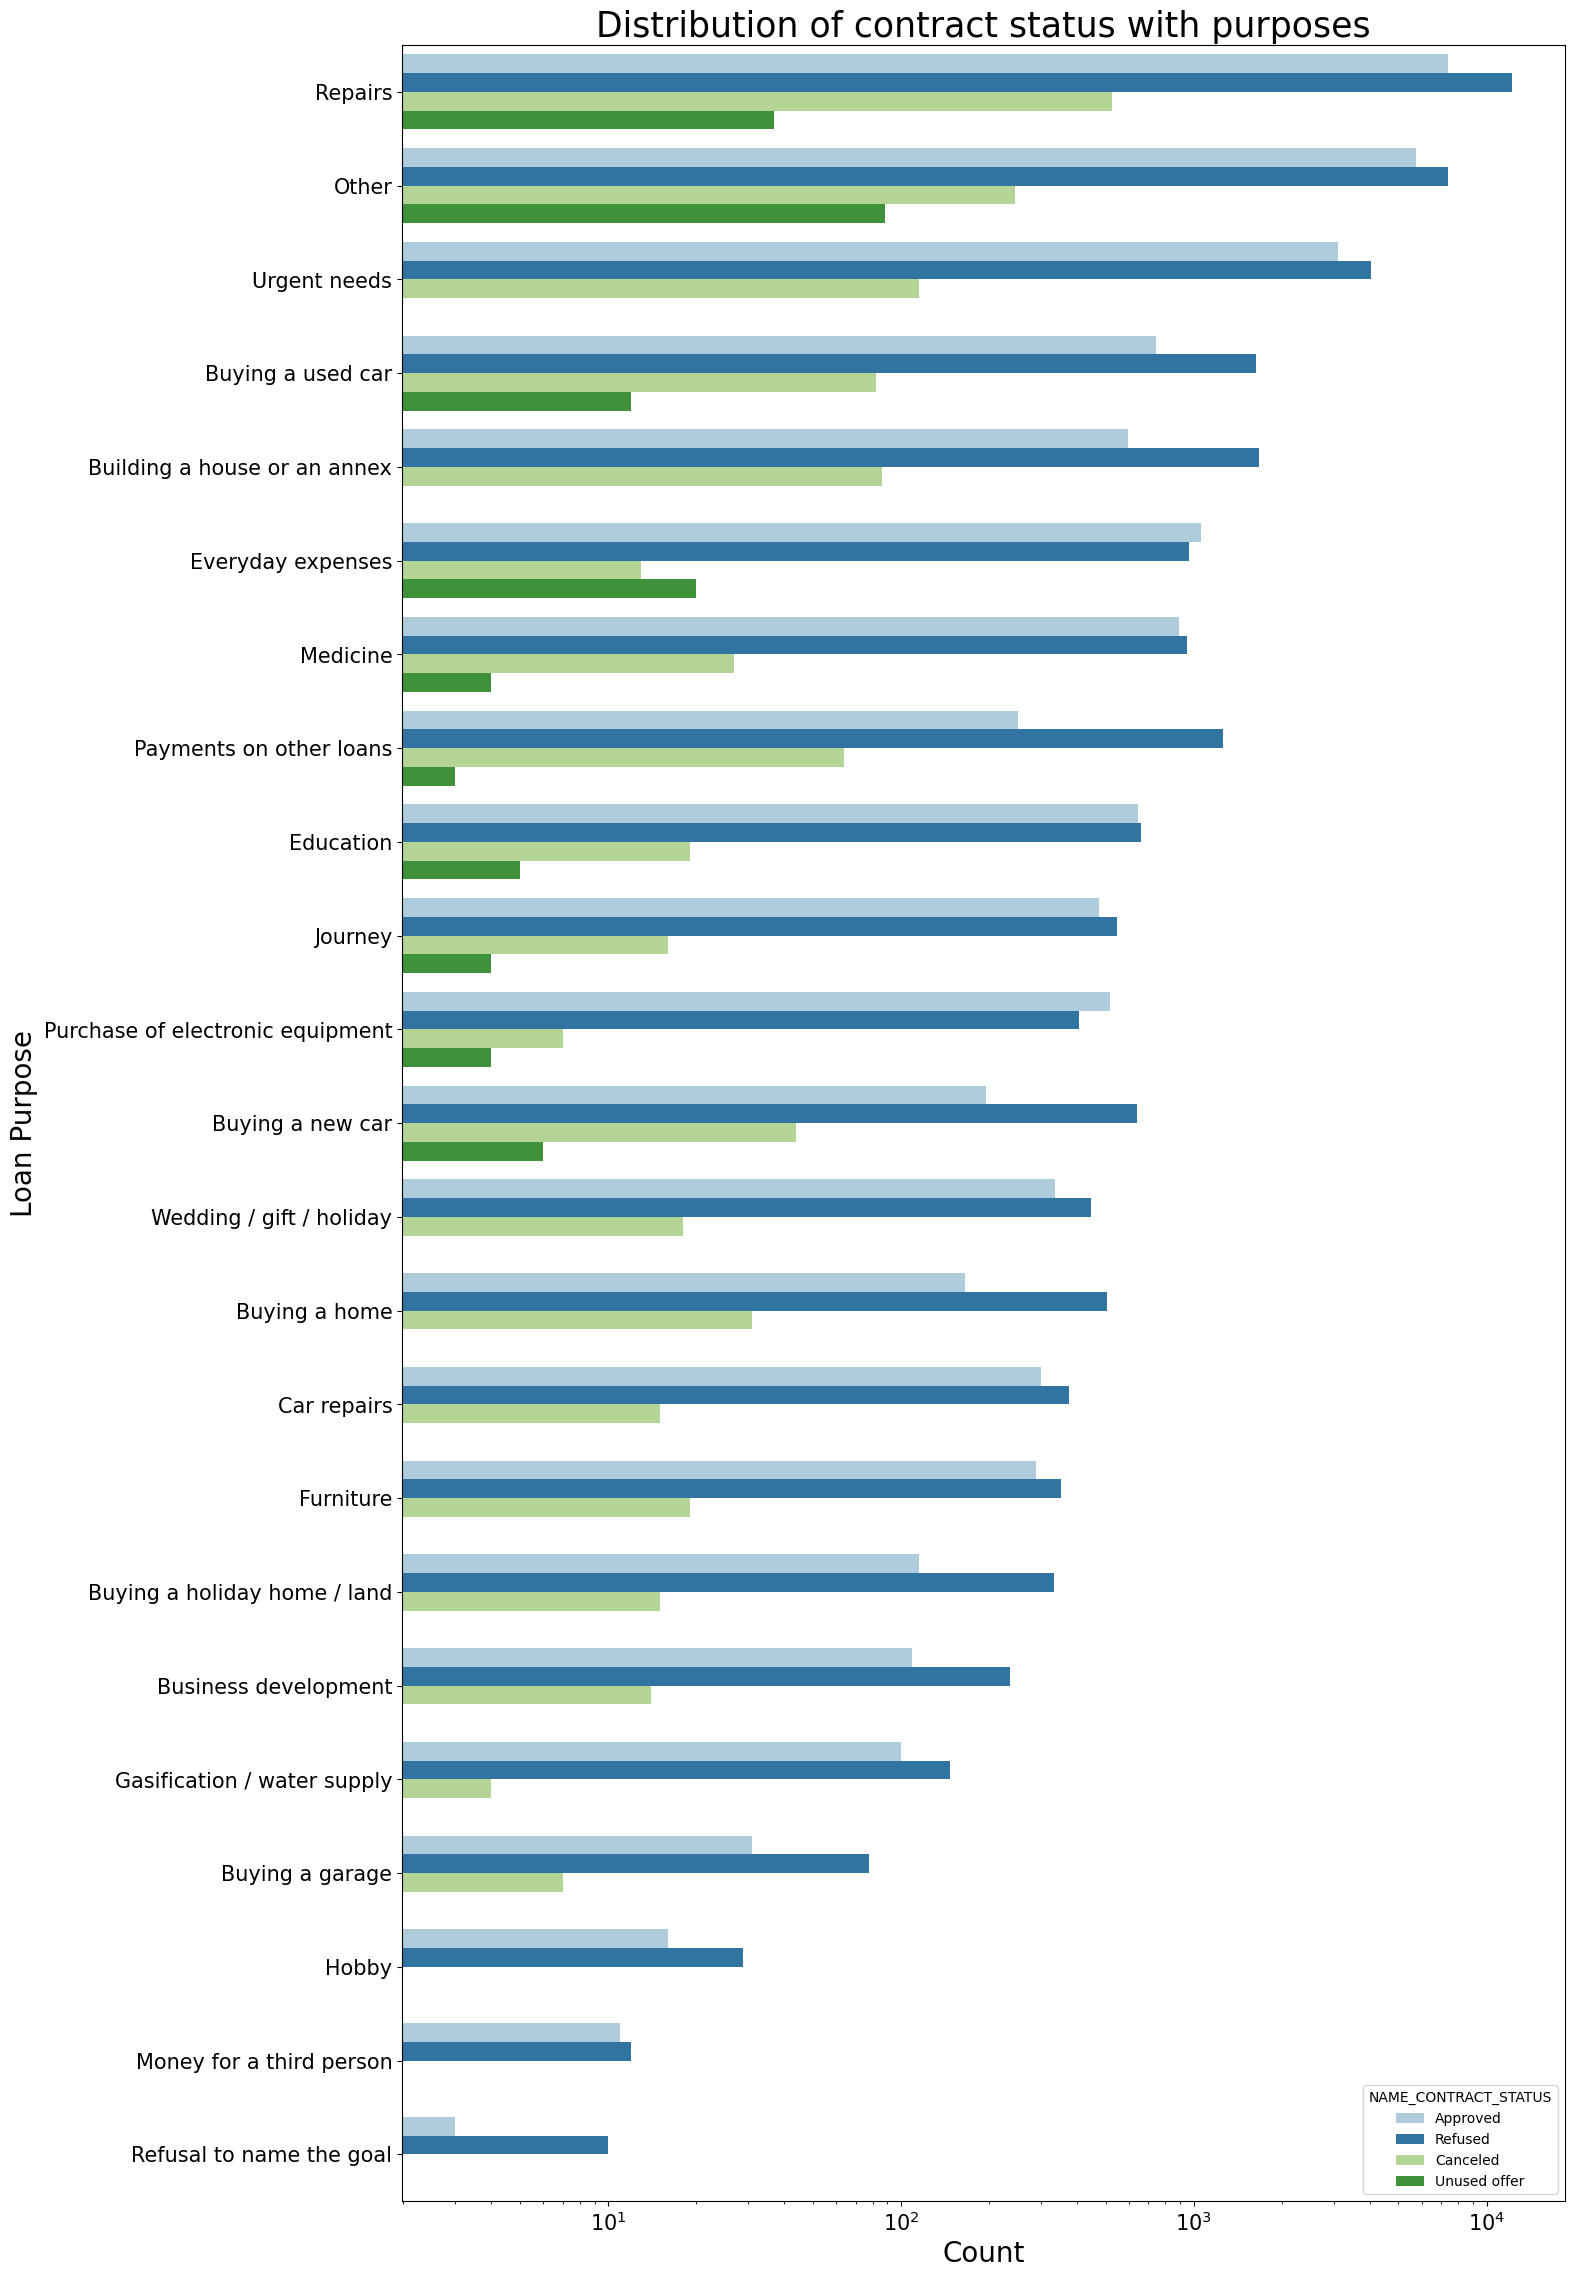

In [218]:
plt.figure(figsize=[15,28])

sns.countplot(data = merged_df, y  = 'NAME_CASH_LOAN_PURPOSE',order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='Paired')

plt.title('Distribution of contract status with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

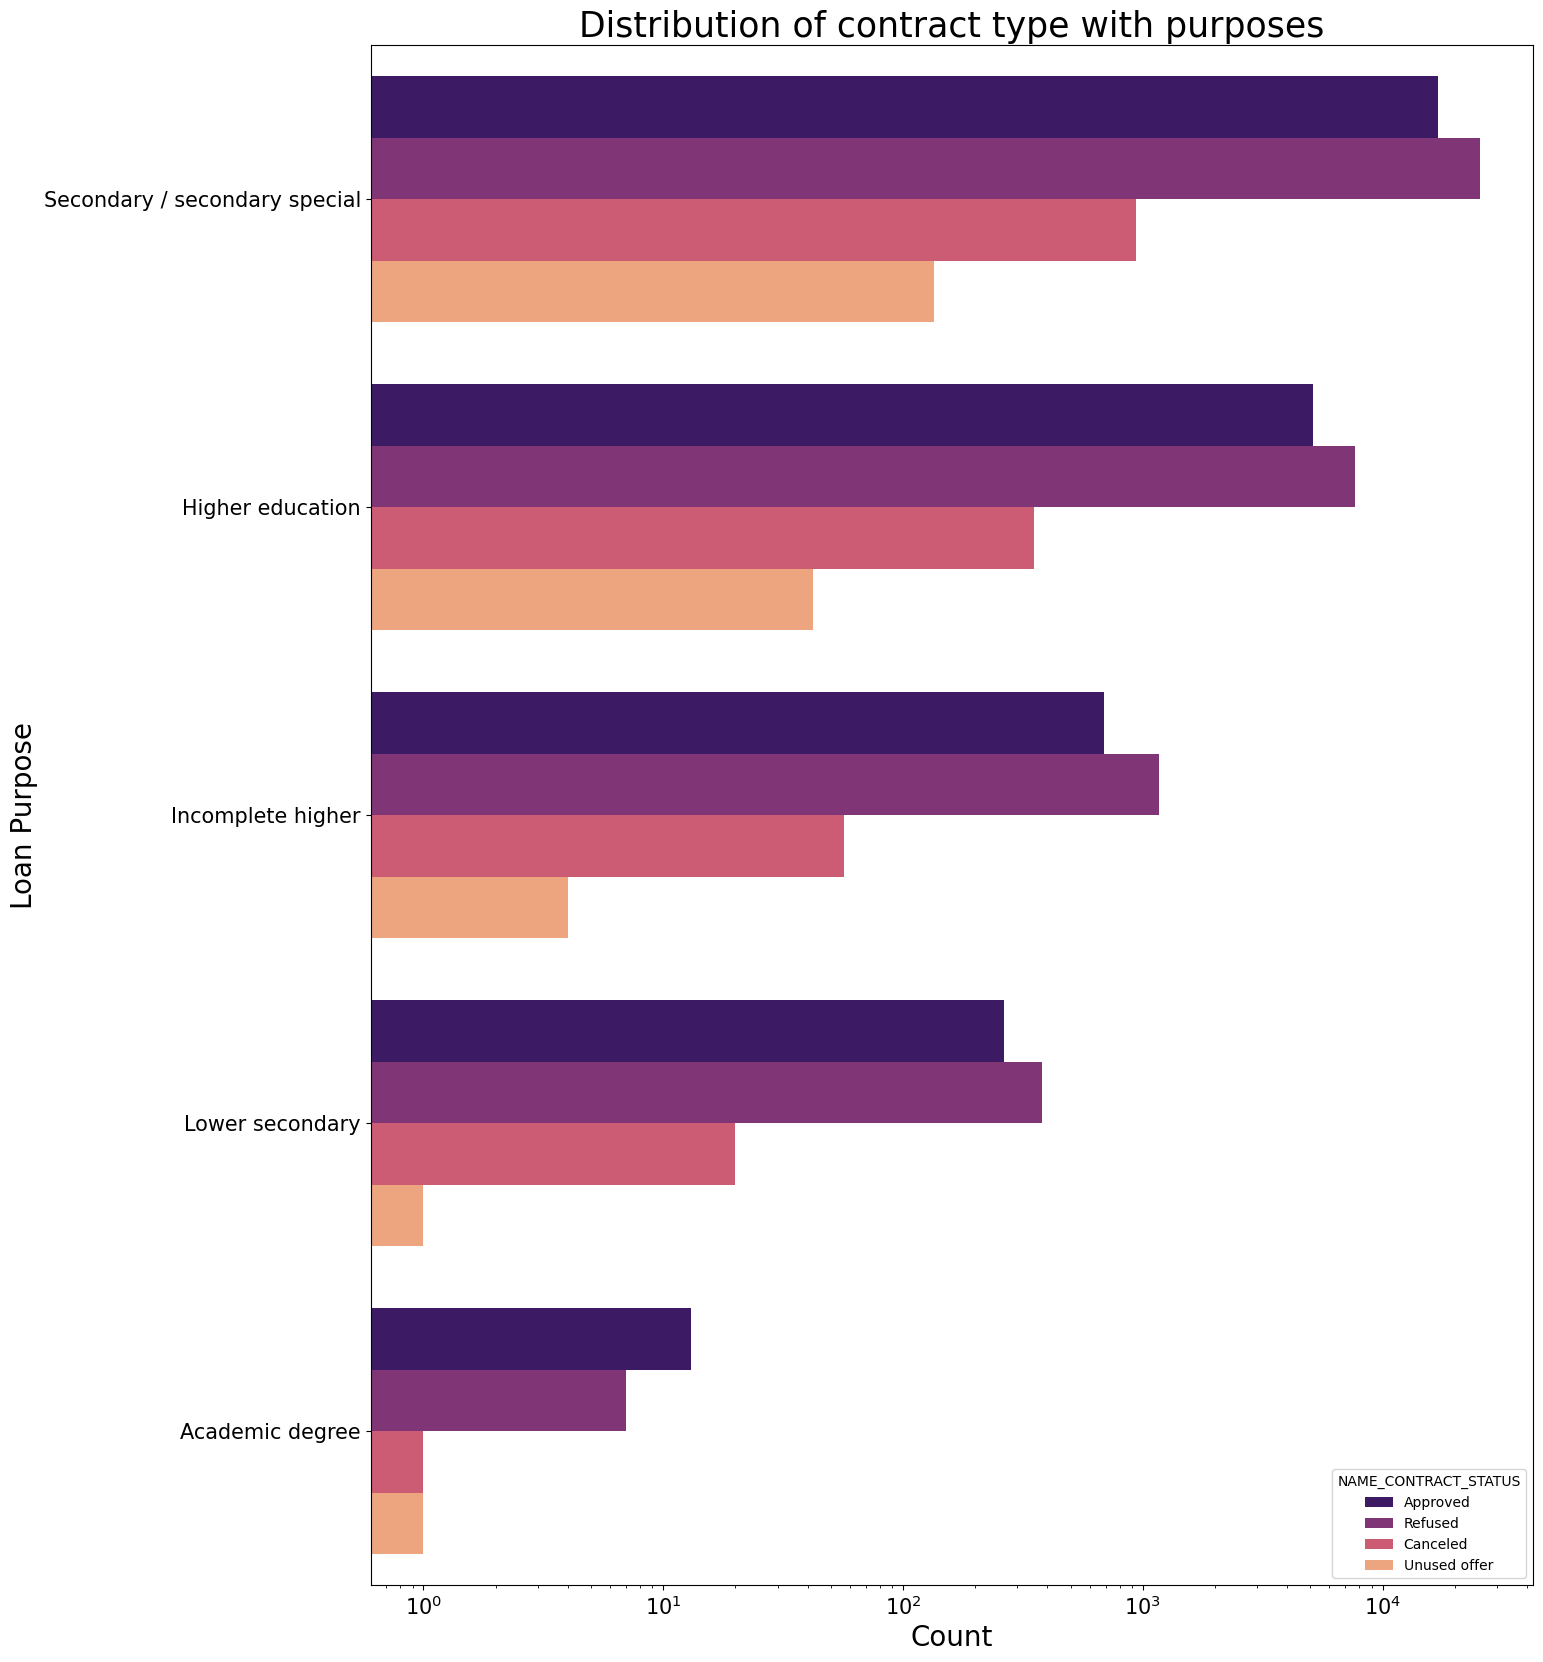

In [220]:
plt.figure(figsize=[15,20])

sns.countplot(data = merged_df, y  = 'NAME_EDUCATION_TYPE',order=merged_df['NAME_EDUCATION_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of contract type with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

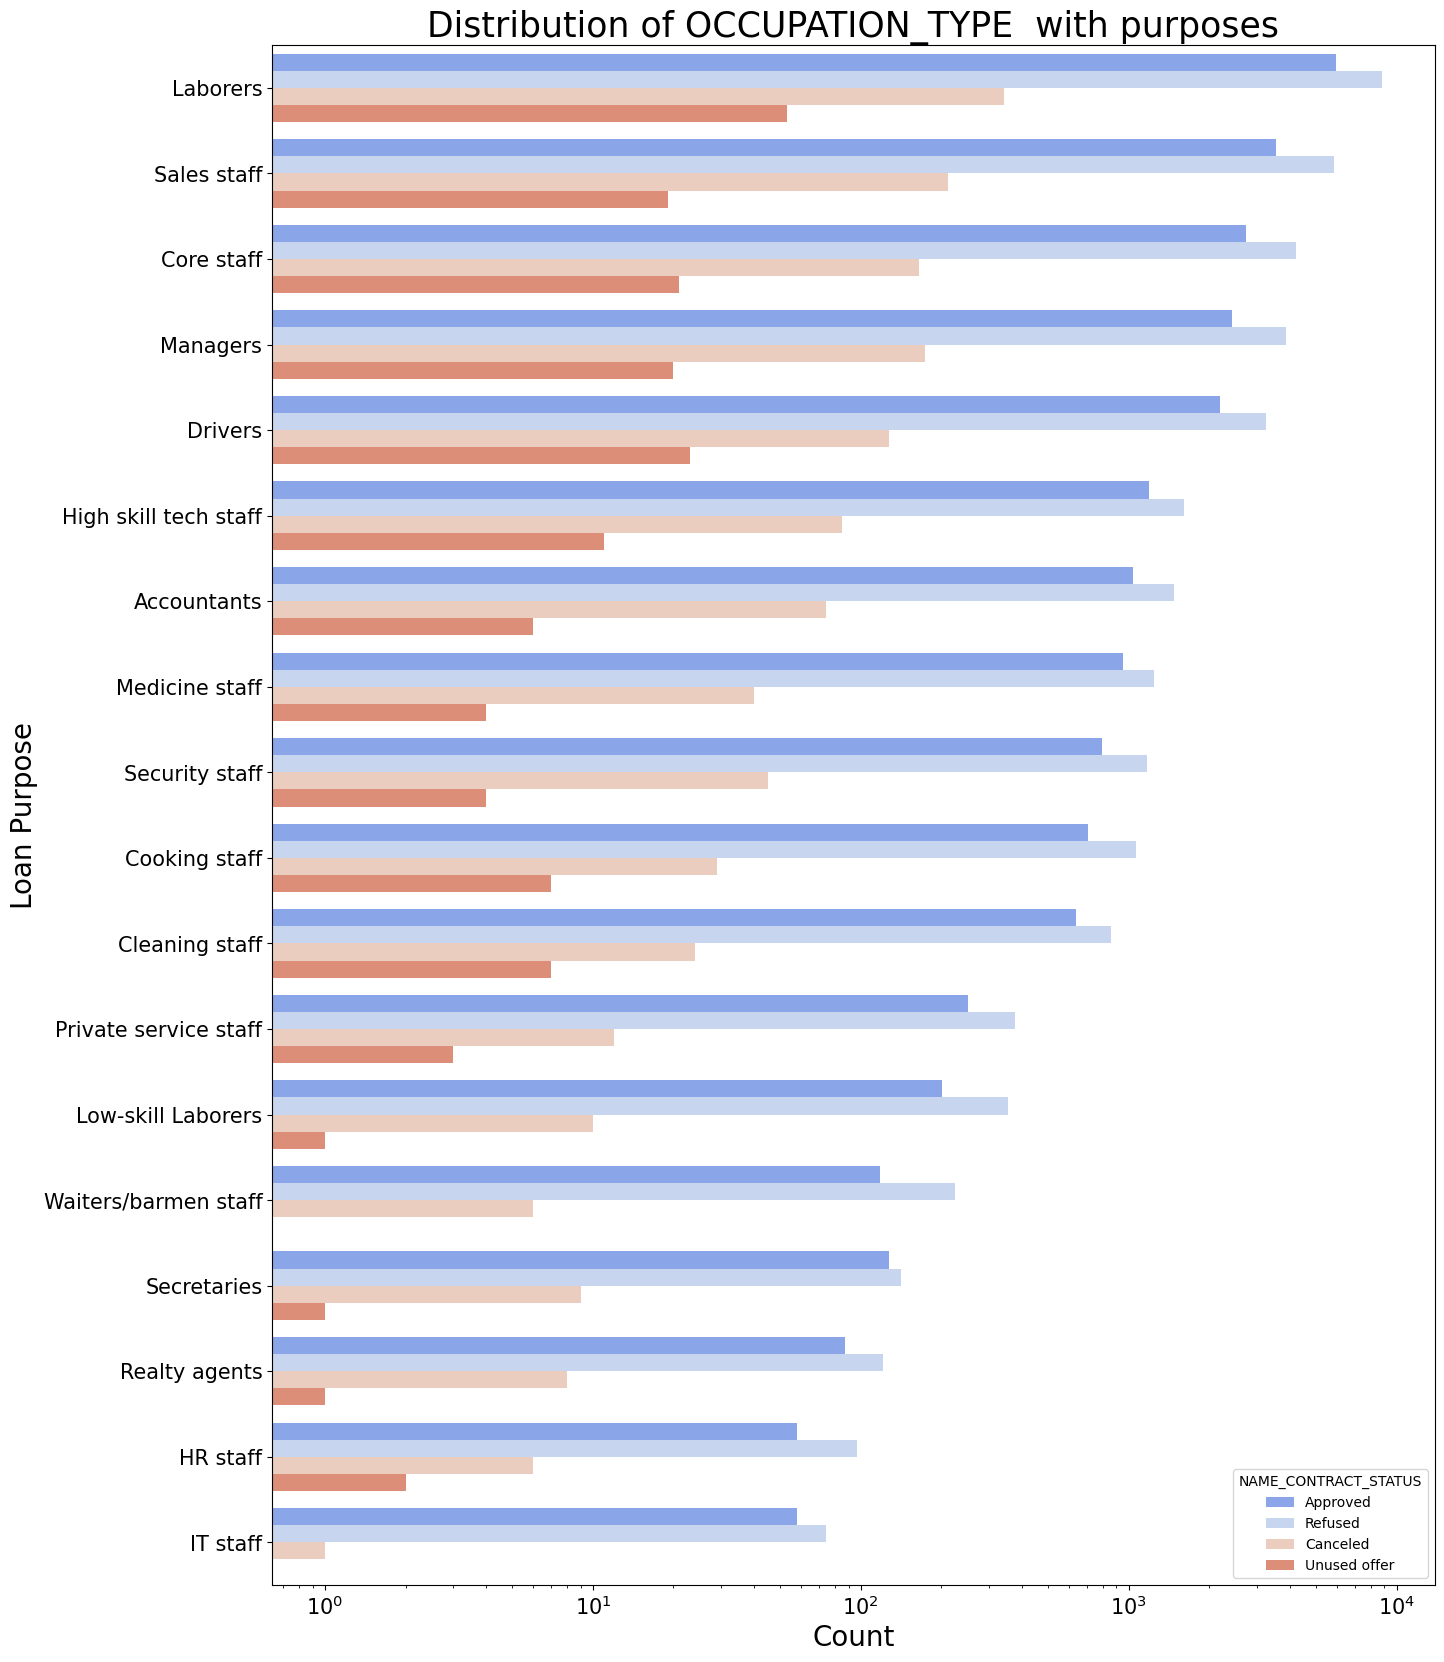

In [222]:
plt.figure(figsize=[15,20])

sns.countplot(data = merged_df, y  = 'OCCUPATION_TYPE',order=merged_df['OCCUPATION_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='coolwarm')

plt.title('Distribution of OCCUPATION_TYPE  with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_10340\1132921702.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =merged_df, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='Paired', ci=None)


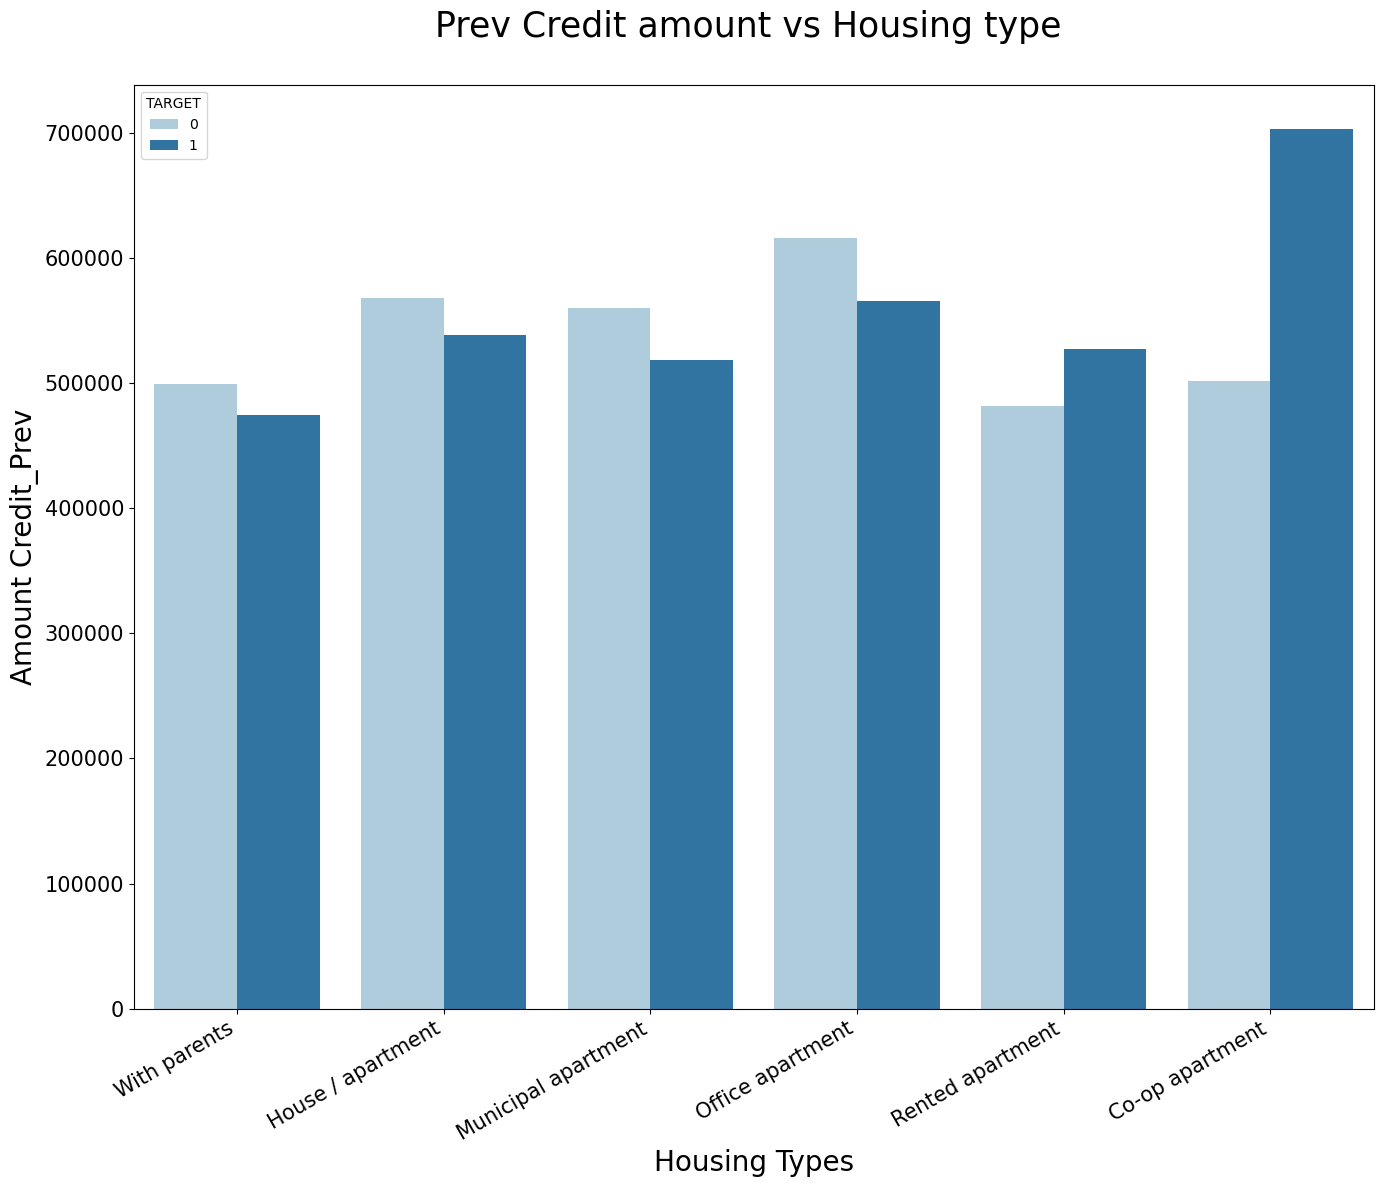

In [224]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =merged_df, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='Paired', ci=None)
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15, ha='right')
plt.yticks(fontsize=15)

plt.show()

### Abstract
This document outlines the critical columns to retain and discard in loan application datasets for effective analysis of loan default risk. It highlights essential data points, such as the target variable `TARGET`, various loan and applicant characteristics, and operational data indicators that help predict default likelihood. Conversely, it identifies columns of low predictive power or redundancy, such as various flag indicators and non-essential demographic information, which should be dropped to enhance model accuracy.

### Key Points
- The `TARGET` variable is crucial for determining loan default status in the `application` dataset.
- Key financial indicators include `AMT_CREDIT`, `AMT_ANNUITY`, and `AMT_INCOME_TOTAL` to assess loan affordability and repayment capacity.
- Demographic details like `CODE_GENDER` and `NAME_FAMILY_STATUS` can provide insights into the risk profile of applicants.
- Additional important indicators such as `LOAN_INCOME_RATIO` are calculated to understand the relationship between loan amount and income.
- Redundant columns like `FLAG_MOBIL` and documents flags should be removed as they contribute little to predictive analysis.
- In the `previous_application` dataset, relevant historical data includes loan types, statuses, and payment details, linking to the main application dataset.
- Columns with excessive missing values, such as `DAYS_FIRST_DRAWING`, should be dropped as they do not add significant predictive value.


Demographic factors can significantly influence loan default rates. Here are some key aspects to consider:

### 1. **Age**
   - **Younger Borrowers:** Typically have higher default rates due to limited credit history and experience managing finances.
   - **Older Borrowers:** Often benefit from more stable income and better credit histories, leading to lower default rates.

### 2. **Gender**
   - Studies show that gender may impact the behavior of borrowers, with some analyses suggesting that female borrowers may have lower default rates due to more conservative financial behavior, though this can vary by region and cultural context.

### 3. **Income Level**
   - Higher income levels generally correlate with lower default rates, as borrowers with stable and sufficient income are more likely to meet loan obligations. Low-income borrowers often face financial strain, increasing default risk.

### 4. **Marital Status**
   - Married individuals may have lower default rates due to combined financial resources and shared economic responsibilities. In contrast, single or divorced individuals may face more financial challenges.

### 5. **Education Level**
   - Higher education levels are often associated with better job prospects and higher income, reducing default risk. Conversely, lower education levels may correlate with unstable employment and higher default rates.

### 6. **Employment Status**
   - Individuals with stable, full-time employment typically have lower default rates compared to those in part-time or unstable employment situations. Job security plays a crucial role in financial stability.

### 7. **Race and Ethnicity**
   - Demographic disparities in loan default rates can sometimes reflect broader socioeconomic challenges, such as access to quality jobs and differences in wealth accumulation across various raciato reduce default rates.


# Conclusion
While demographic factors provide valuable insights into potential loan default risks, it's essential to consider them in the context of a broader set of variables, including financial behavior, credit history, and economic conditions. Understanding these relationships can help lenders make more informed decisions and create targeted interventions to reduce default rates.
We found that higher education levels and stable professions led to better loan repayment rates, while unemployed individuals and women on maternity leave showed higher default rates.


# Suggestion
Based on the analysis, I recommend that the bank consider developing specialized loan schemes targeting unemployed individual, as these groups have a higher likelihood of defaulting on loans.

By offering flexible repayment plans, lower interest rates, or deferred payment options, the bank could better support these segments while potentially reducing default rates.

Furthermore, the bank should also factor in education, income levels, and job stability in its loan approval process, prioritizing applicants in stable professions with higher education and income, as these individuals tend to have a better track record of repaying loans.

This data-driven approach would not only improve loan repayment rates but also enhance customer satisfaction and retention.